In [1]:
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = make_circles(n_samples=500, noise=0.1, random_state=42, factor=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

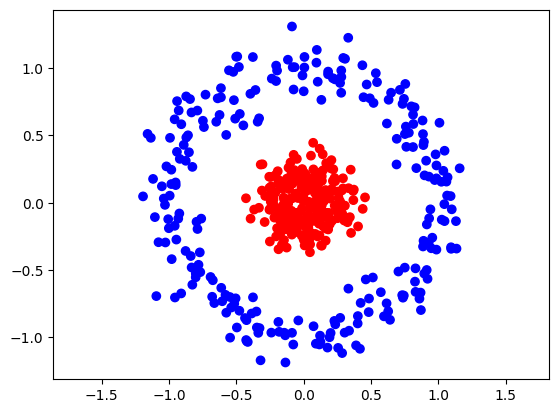

In [3]:
# Plotting
plt.scatter(X[:,0], X[:,1], c=y, cmap=colors.ListedColormap(["blue", "red"]))
plt.axis('equal')
plt.show()

In [4]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [5]:
print(np.unique(y))
# To convert 0 -> -1 for ADA BOOST algorithm
print(f"No of points labelled 1: {len(y[y==1])}, No of points labelled 0: {len(y[y==0])}")

[0 1]
No of points labelled 1: 250, No of points labelled 0: 250


In [6]:
y[y==0] = -1
np.unique(y)

array([-1,  1], dtype=int64)

In [7]:
print(f"No of points labelled 1: {len(y[y==1])}, No of points labelled -1: {len(y[y==-1])}")

No of points labelled 1: 250, No of points labelled -1: 250


In [8]:
class AdaBoost:
    def __init__(self, itr = 25, eta = 0.5):
        self.itr = itr
        self.eta = eta
    def fit(self,X,Y):
        # To initialize the initial weights of each datapoint
        No_Samples  = len(X)
        w = np.full(No_Samples, 1/No_Samples)
        
        # To store each weak classifier and its corresponding weight
        self.classifer = [] 
        self.alpha = []
        
        for i in range(self.itr):
            
            # Fitting the weak classifier i.e., Decision stump
            Classifier = DecisionTreeClassifier(max_depth=1)
            Classifier.fit(X, Y, sample_weight=w)

            Classifier_predict = Classifier.predict(X)
            
            # To compute error : Sum of weights of all the incorrectly classified points
            error = np.sum(w* (Classifier_predict!=Y))
            
            # Alpha
            Alpha = 0.5 * np.log((1 - error)/ (error + 1e-10))
            # 1e-10 added to avoid division by zero error, it doesn't affect the log term value.
            
            # SToring classifier and its weights(alpha)
            self.classifer.append(Classifier)
            self.alpha.append(Alpha)
            
            w = w*np.exp(-Alpha * Y * Classifier_predict)
            w = w/np.sum(w)
            
            #plot_decision_boundary(self.classifer, X, Y)
    
    def Predict(self, X):
        y_pred = np.zeros(X.shape[0])
        
        for classifier, alpha in zip(self.classifer, self.alpha):
            y_pred = y_pred+ self.eta*alpha*classifier.predict(X)
        return np.sign(y_pred)
    

In [9]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.45, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.Predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#ffcccc', '#cce5ff'])  
    plt.contourf(x1, x2, y_pred, alpha=0.5, cmap=custom_cmap)
    
    if contour:
        custom_cmap2 = ListedColormap(['#990000', '#003366']) 
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    
    plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], "o", color='orange', alpha=alpha, label='Class -1')  # Class -1
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "o", color='blue', alpha=alpha, label='Class 1')  # Class 1
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    plt.legend()
    plt.title("Final Ensembled Classifier Decision Boundary")
    plt.show()


In [10]:
def plot_all_decision_boundaries(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.45, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]

    custom_cmap = ListedColormap(['#ffcccc', '#cce5ff'])  
    plt.contourf(x1, x2, clf.Predict(X_new).reshape(x1.shape), alpha=0.5, cmap=custom_cmap)

    if contour:
        colors = ['#FF5733', '#33FF57', '#3357FF', '#F39C12', '#8E44AD', '#1ABC9C', '#D35400', '#C0392B', '#27AE60', '#2980B9', '#9B59B6', '#E74C3C', '#F1C40F']

        for i, classifier in enumerate(clf.classifer):
            if i >= len(colors):
                color = '#000000' 
            else:
                color = colors[i % len(colors)]
            
            y_pred = classifier.predict(X_new).reshape(x1.shape)
            plt.contour(x1, x2, y_pred, colors=[color], alpha=0.8, linestyles='--', linewidths=1)

    plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], "o", color='orange', alpha=alpha, label='Class -1')  # Class -1
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "o", color='blue', alpha=alpha, label='Class 1')  # Class 1
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    plt.legend()
    plt.title("AdaBoost Ensemble Decision Boundaries(Classifier Fit at every Iteration)")
    plt.show()


In [11]:
k =0
max_accuracy = 0
for i in range(1, 30):
    c = AdaBoost(i)
    c.fit(X,y)
    Y = c.Predict(X)
    accuracy = np.mean(y == Y)
    if(accuracy>max_accuracy):
        k = i
        max_accuracy = accuracy
    
print(f"Accuracy: {max_accuracy * 100:.2f}% for No of Classifiers in Ensemble:{k}")

Accuracy: 100.00% for No of Classifiers in Ensemble:13


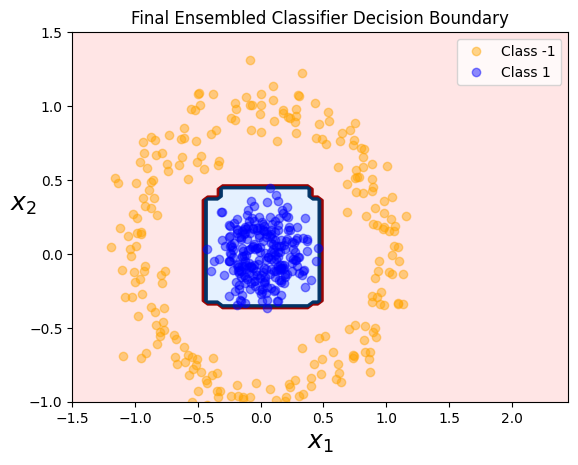

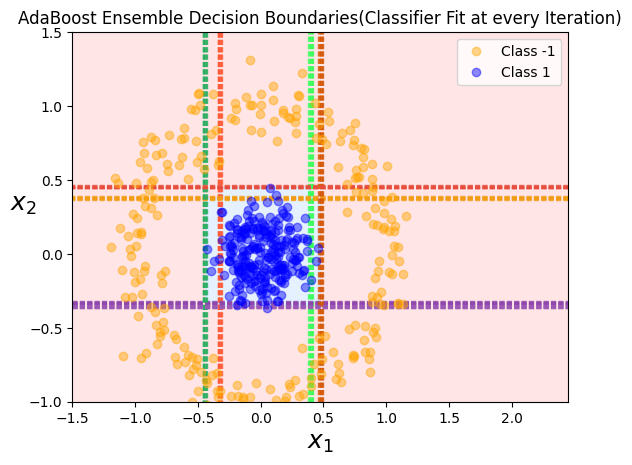

In [12]:
# Plotting
c = AdaBoost(13)
c.fit(X,y)
plot_decision_boundary(c, X, y)
plot_all_decision_boundaries(c, X, y)
Y = c.Predict(X)
accuracy = np.mean(y == Y)

# AdaBoost Algorithm Implementation
1. The Make Circles dataset is created as indicated.
2. Implementing AdaBoost Algorithm:
    1. The output label y is converted from [0, 1] to [-1, 1] such that the error computation is performed according to the algorithm's description.
    2. The AdaBoost class when called as a object will accept two parameters, the no of iterations(No of weak classifiers to ensemble to get the desired output), eta i.e., the contribution of each weak classifier to the final output.
    3. The class has two functions fit and predict.
    4. The fit functions describes the AdaBoost functionality:
        1. Initialize uniform weights to all the data points.
        2. Define objects to store the classifier and the corresponding alpha value for the final prediction
        3. Based on the Iteration value: In each iteration, Create an object of the weak classifier.
        4. Fit the weak classfier with the data along with the weights.
        5. Obtain the weak classifier's predictions.
        6. Compute error : Sum of weights of all the incorrectly classified points
        7. Calculate the Alpha value based on the error of the current weak classifier's performance.
        8. Store classifier and its Alpha value in the objects(lists) created in earlier steps.
        9. Update weights of each data points i.e., the weights of correctly classified points is reduced by e^{-alpha} and incorrectly classified points weights is increased by e^{+alpha}.
    5. Predict function: Obtains the final prediction based on all the classifier's outputs in the ensemble along with their contribution decided by the eta value.